https://facebook.github.io/prophet/docs/quick_start.html
https://towardsdatascience.com/time-series-forecasting-with-prophet-54f2ac5e722e
https://towardsdatascience.com/time-series-prediction-using-prophet-in-python-35d65f626236
https://www.kaggle.com/robikscube/time-series-forecasting-with-prophet

In [62]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from fbprophet import Prophet
%matplotlib inline

In [66]:
data = pd.read_excel('EVDS_Data.xlsx', parse_dates=['Tarih'], dayfirst=True, index_col='Tarih')
data.head()

,USD_Alis,EURO_Alis,GBP_Alis
Tarih,,,
2004-02-09,1.332801,1.672132,2.445506
2004-02-10,1.342133,1.709341,2.494961
2004-02-11,1.338843,1.709301,2.501692
2004-02-12,1.334726,1.691499,2.494668
2004-02-13,1.314923,1.685600,2.487623


In [67]:
data = data.astype('float32')

In [68]:
data.interpolate(method='linear', limit_direction='both', inplace=True)

In [69]:
data.isnull().sum()

USD_Alis     0
EURO_Alis    0
GBP_Alis     0
dtype: int64

In [70]:
usd = data.drop(['EURO_Alis', 'GBP_Alis'], axis='columns')
df = usd.reset_index()
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2004-02-09,1.332801
1,2004-02-10,1.342133
2,2004-02-11,1.338843
3,2004-02-12,1.334726
4,2004-02-13,1.314923


In [71]:
train_size = int(np.floor(len(df) * 0.80))
train_size

4724

In [72]:
len(df)-train_size

1182

In [73]:
train, test = df[:train_size], df[train_size:len(df)]

In [74]:
model = Prophet()
model.fit(train)
future = model.make_future_dataframe(periods=30, freq='M')
forecast = model.predict(future)
forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-02-09,1.318092,1.224552,1.411600,1.318092,1.318092,-0.002112,-0.002112,-0.002112,-0.001084,-0.001084,-0.001084,-0.001029,-0.001029,-0.001029,0.0,0.0,0.0,1.315980
1,2004-02-10,1.319208,1.232866,1.421566,1.319208,1.319208,-0.000915,-0.000915,-0.000915,0.000447,0.000447,0.000447,-0.001362,-0.001362,-0.001362,0.0,0.0,0.0,1.318293
2,2004-02-11,1.320324,1.231939,1.421525,1.320324,1.320324,-0.000890,-0.000890,-0.000890,0.000751,0.000751,0.000751,-0.001641,-0.001641,-0.001641,0.0,0.0,0.0,1.319434
3,2004-02-12,1.321440,1.222845,1.412729,1.321440,1.321440,-0.001257,-0.001257,-0.001257,0.000598,0.000598,0.000598,-0.001855,-0.001855,-0.001855,0.0,0.0,0.0,1.320183
4,2004-02-13,1.322556,1.231297,1.415867,1.322556,1.322556,-0.001790,-0.001790,-0.001790,0.000208,0.000208,0.000208,-0.001998,-0.001998,-0.001998,0.0,0.0,0.0,1.320766


In [75]:
trace = go.Scatter(
    x=df['ds'],
    y=df['y'],
    opacity=1,
    marker=dict(size=3)
    )
    
layout = go.Layout(
    xaxis=dict(tickangle=-60, tickvals=df.index[::365], tickformat= '%d/%m/%Y'),
    title='USD 02.2004-02.2020 Günlük Zaman Serisi'
)

go.Figure(data=trace, layout=layout)

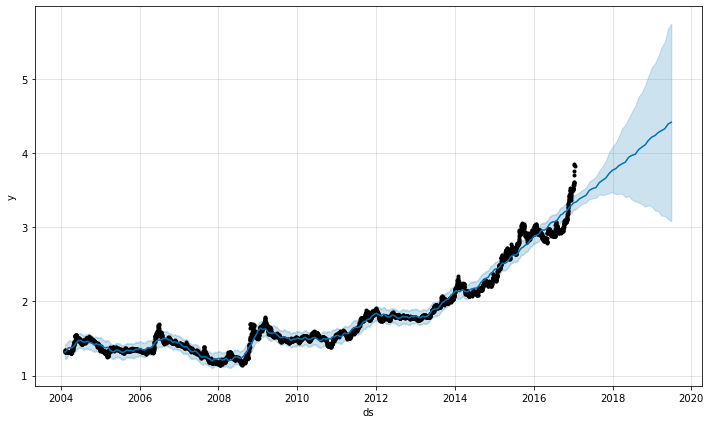

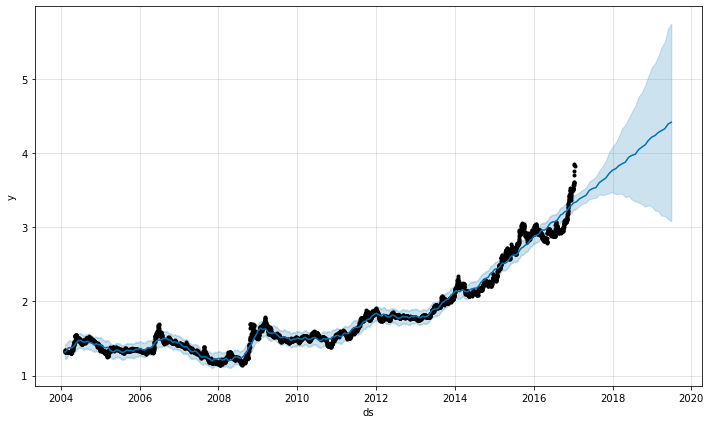

In [76]:
model.plot(forecast)

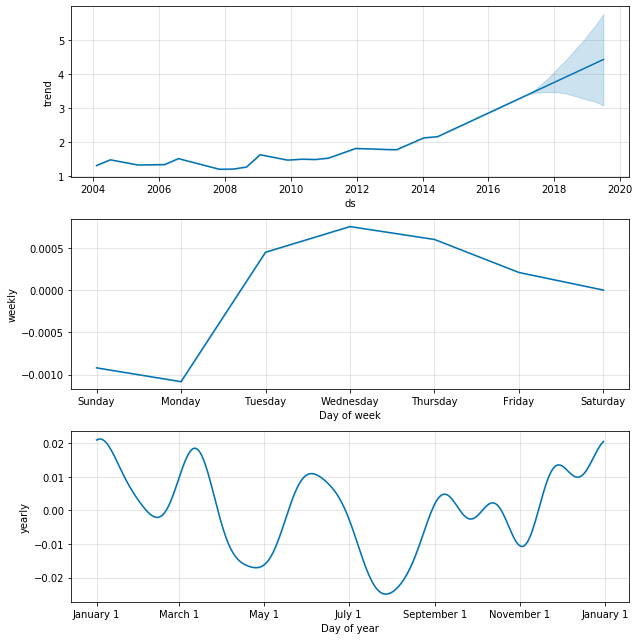

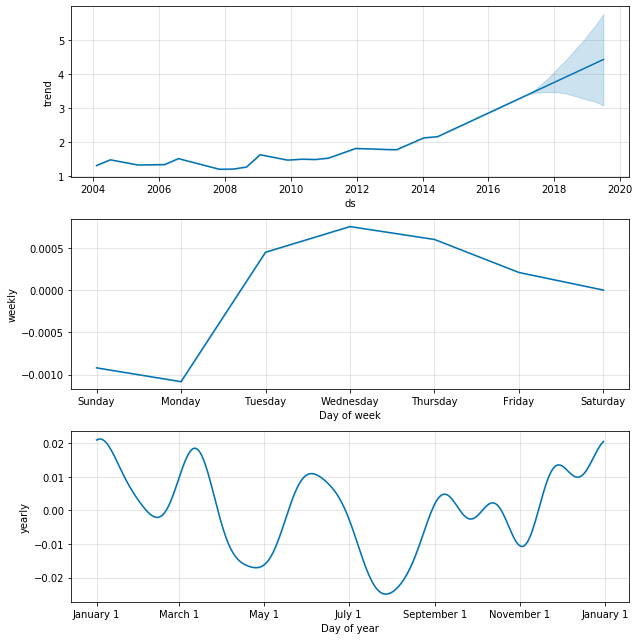

In [77]:
model.plot_components(forecast)